# Análisis ConnectaTel

Como **analista de datos**, tu objetivo es evaluar el **comportamiento de los clientes** de una empresa de telecomunicaciones en Latinoamérica, ConnectaTel. 

Trabajaremos con información registrada **hasta el año 2024**, lo cual permitirá analizar el comportamiento del negocio dentro de ese periodo.

Para ello trabajarás con tres datasets:  

- **plans.csv** → información de los planes actuales (precio, minutos incluidos, GB incluidos, costo por extra)  
- **users.csv** → información de los clientes (edad, ciudad, fecha de registro, plan, churn)  
- **usage.csv** → detalle del **uso real** de los servicios (llamadas y mensajes)  

Deberás **explorar**, **limpiar** y **analizar** estos datos para construir un **perfil estadístico** de los clientes, detectar **comportamientos atípicos** y crear **segmentos de clientes**.  

Este análisis te permitirá **identificar patrones de consumo**, **diseñar estrategias de retención** y **sugerir mejoras en los planes** ofrecidos por la empresa.

> 💡 Antes de empezar, recuerda pensar de forma **programática**: ¿qué pasos necesitas? ¿En qué orden? ¿Qué quieres medir y por qué?


--- 
## 🧩 Paso 1: Cargar y explorar

Antes de limpiar o combinar los datos, es necesario **familiarizarte con la estructura de los tres datasets**.  
En esta etapa, validarás que los archivos se carguen correctamente, conocerás sus columnas y tipos de datos, y detectarás posibles inconsistencias.

### 1.1 Carga de datos y vista rápida

**🎯 Objetivo:**  
Tener los **3 datasets listos en memoria**, entender su contenido y realizar una revisión preliminar.

**Instrucciones:**  
- Importa las librerías necesarias (por ejemplo `pandas`, `seaborn`, `matplotlib.pyplot`)
- Carga los archivos CSV usando `pd.read_csv()`:
  - **`/datasets/plans.csv`**  
  - **`/datasets/users_latam.csv`**  
  - **`/datasets/usage.csv`**  
- Guarda los DataFrames en las variables: `plans`, `users`, `usage`.  
- Muestra las primeras filas de cada DataFrame usando `.head()`.


In [2]:
# importar librerías
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
# cargar archivos
plans = pd.read_csv('/datasets/plans.csv')
users = pd.read_csv('/datasets/users_latam.csv')
usage = pd.read_csv('/datasets/usage.csv')


In [4]:
# mostrar las primeras 5 filas de plans
print("Planes:")
plans.head()

Planes:


,plan_name,messages_included,gb_per_month,minutes_included,usd_monthly_pay,usd_per_gb,usd_per_message,usd_per_minute
0,Basico,100,5,100,12,1.2,0.08,0.10
1,Premium,500,20,600,25,1.0,0.05,0.07


In [5]:
# mostrar las primeras 5 filas de users
print("Usuarios:")
users.head()


Usuarios:


,user_id,first_name,last_name,age,city,reg_date,plan,churn_date
0,10000,Carlos,Garcia,38,Medellín,2022-01-01 00:00:00.000000000,Basico,NaN
1,10001,Mateo,Torres,53,?,2022-01-01 06:34:17.914478619,Basico,NaN
2,10002,Sofia,Ramirez,57,CDMX,2022-01-01 13:08:35.828957239,Basico,NaN
3,10003,Mateo,Ramirez,69,Bogotá,2022-01-01 19:42:53.743435858,Premium,NaN
4,10004,Mateo,Torres,63,GDL,2022-01-02 02:17:11.657914478,Basico,NaN


In [6]:
# mostrar las primeras 5 filas de usage
print("Uso:")
usage.head()


Uso:


,id,user_id,type,date,duration,length
0,1,10332,call,2024-01-01 00:00:00.000000000,0.09,NaN
1,2,11458,text,2024-01-01 00:06:30.969774244,NaN,39.0
2,3,11777,text,2024-01-01 00:13:01.939548488,NaN,36.0
3,4,10682,call,2024-01-01 00:19:32.909322733,1.53,NaN
4,5,12742,call,2024-01-01 00:26:03.879096977,4.84,NaN


**Tip:** Si no usas `print()` la tabla se vera mejor.

### 1.2 Exploración de la estructura de los datasets

**🎯 Objetivo:**  
Conocer la **estructura de cada dataset**, revisar cuántas filas y columnas tienen, identificar los **tipos de datos** de cada columna y detectar posibles **inconsistencias o valores nulos** antes de iniciar el análisis.

**Instrucciones:**  
- Revisa el **número de filas y columnas** de cada dataset usando `.shape`.  
- Usa `.info()` en cada DataFrame para obtener un **resumen completo** de columnas, tipos de datos y valores no nulos.  

In [7]:
# revisar el número de filas y columnas de cada dataset
print("plans", plans.shape)
print("users:", users.shape)
print("usage:", usage.shape)


plans (2, 8)
users: (4000, 8)
usage: (40000, 6)


In [8]:
# inspección de plans con .info()
print("\n--- Plans ---")
plans.info()



--- Plans ---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2 entries, 0 to 1
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   plan_name          2 non-null      object 
 1   messages_included  2 non-null      int64  
 2   gb_per_month       2 non-null      int64  
 3   minutes_included   2 non-null      int64  
 4   usd_monthly_pay    2 non-null      int64  
 5   usd_per_gb         2 non-null      float64
 6   usd_per_message    2 non-null      float64
 7   usd_per_minute     2 non-null      float64
dtypes: float64(3), int64(4), object(1)
memory usage: 256.0+ bytes


In [9]:
# inspección de users con .info()

print("\n--- Users ---")
users.info()



--- Users ---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4000 entries, 0 to 3999
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   user_id     4000 non-null   int64 
 1   first_name  4000 non-null   object
 2   last_name   4000 non-null   object
 3   age         4000 non-null   int64 
 4   city        3531 non-null   object
 5   reg_date    4000 non-null   object
 6   plan        4000 non-null   object
 7   churn_date  466 non-null    object
dtypes: int64(2), object(6)
memory usage: 250.1+ KB


In [11]:
# inspección de usage con .info()

print("\n--- Usage ---")
usage.info()



--- Usage ---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40000 entries, 0 to 39999
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   id        40000 non-null  int64  
 1   user_id   40000 non-null  int64  
 2   type      40000 non-null  object 
 3   date      39950 non-null  object 
 4   duration  17924 non-null  float64
 5   length    22104 non-null  float64
dtypes: float64(2), int64(2), object(2)
memory usage: 1.8+ MB


---

## 🧩Paso 2: Identificación de problemas de calidad de datos

### 2.1 Revisión de valores nulos

**🎯 Objetivo:**  
Detectar la presencia y magnitud de valores faltantes para evaluar si afectan el análisis o requieren imputación/eliminación.

**Instrucciones:**  
- Cuenta valores nulos por columna para cada dataset.
- Calcula la proporción de nulos por columna para cada dataset.

El dataset `plans` solamente tiene 2 renglones y se puede observar que no tiene ausentes, por ello no necesita exploración adicional.

<br>
<details>
<summary>Haz clic para ver la pista</summary>
Usa `.isna().sum()` para contar valores nulos y usa `.isna().mean()` para calcular la proporción.

In [25]:

# cantidad de nulos para users

print("Users - Cantidad de valores nulos:")
print(users.isna().sum())

print("\nUsers - Proporción de valores nulos:")
print(users.isna().mean())

print("\n- users:- Si alguna columna crítica como edad, plan o churn tiene más del 5% de nulos, recomendaría reemplazar valores faltantes (edad con mediana, plan con categoría “desconocido”) o investigar la causa.- Si una columna supera el 80–90% de nulos (ej. algún campo opcional), lo más eficiente es eliminarla del análisis.")


Users - Cantidad de valores nulos:
user_id          0
first_name       0
last_name        0
age              0
city           469
reg_date         0
plan             0
churn_date    3534
dtype: int64

Users - Proporción de valores nulos:
user_id       0.00000
first_name    0.00000
last_name     0.00000
age           0.00000
city          0.11725
reg_date      0.00000
plan          0.00000
churn_date    0.88350
dtype: float64

- users:- Si alguna columna crítica como edad, plan o churn tiene más del 5% de nulos, recomendaría reemplazar valores faltantes (edad con mediana, plan con categoría “desconocido”) o investigar la causa.- Si una columna supera el 80–90% de nulos (ej. algún campo opcional), lo más eficiente es eliminarla del análisis.


In [28]:
# cantidad de nulos para usage
print("\nUsage - Cantidad de valores nulos:")
print(usage.isna().sum())

print("\nUsage - Proporción de valores nulos:")
print(usage.isna().mean())

print("\nplans: No presenta valores nulos (solo 2 filas), no requiere exploración adicional.")

print("\n- usage: - Si faltan valores en llamadas o mensajes, se puede cambiar con 0 (asumiendo que el cliente no usó ese servicio en ese periodo).- Si faltan en campos de identificación (ej. user_id), esos registros deberían eliminarse porque no se pueden asociar a un cliente.")




Usage - Cantidad de valores nulos:
id              0
user_id         0
type            0
date           50
duration    22076
length      17896
dtype: int64

Usage - Proporción de valores nulos:
id          0.00000
user_id     0.00000
type        0.00000
date        0.00125
duration    0.55190
length      0.44740
dtype: float64

plans: No presenta valores nulos (solo 2 filas), no requiere exploración adicional.

- usage: - Si faltan valores en llamadas o mensajes, se puede cambiar con 0 (asumiendo que el cliente no usó ese servicio en ese periodo).- Si faltan en campos de identificación (ej. user_id), esos registros deberían eliminarse porque no se pueden asociar a un cliente.


✍️ **Comentario**: Haz doble clic en este bloque y escribe tu diagnóstico al final del bloque. Incluye qué ves y que acción recomendarías para cada caso.

💡 **Nota:** Justifica tus decisiones brevemente (1 línea por caso).
* Hint:
 - Si una columna tiene **más del 80–90% de nulos**, normalmente se **ignora o elimina**.  
 - Si tiene **entre 5% y 30%**, generalmente se **investiga para imputar o dejar como nulos**.  
 - Si es **menor al 5%**, suele ser un caso simple de imputación o dejar como nulos. 
 
 ---

**Valores nulos**  
- ¿Qué columnas tienen valores faltantes y en qué proporción?  
- Indica qué harías: ¿imputar, eliminar, ignorar?

**En Resumen:**
- Eliminar columnas con más del 80–90% de nulos.
- Rellenar valores moderados (5–30%) según contexto.
- Ignorar o dejar como nulos si son pocos (<5%) y no afectan el análisis.

### 2.2 Detección de valores inválidos y sentinels

🎯 **Objetivo:**  
Identificar sentinels: valores que no deberían estar en el dataset.

**Instrucciones:**
- Explora las columnas numéricas con **un resumen estadístico** y describe brevemente que encontraste.
- Explora las columnas categóricas **relevantes**, revisando sus valores únicos y describe brevemente que encontraste.


El dataset `plans` solamente tiene 2 renglones, por ello no necesita exploración adicional.

In [29]:
# explorar columnas numéricas de users

print("Resumen estadístico de columnas numéricas en users:")
print(users.describe())


Resumen estadístico de columnas numéricas en users:
            user_id          age
count   4000.000000  4000.000000
mean   11999.500000    33.739750
std     1154.844867   123.232257
min    10000.000000  -999.000000
25%    10999.750000    32.000000
50%    11999.500000    47.000000
75%    12999.250000    63.000000
max    13999.000000    79.000000



**Columna user_id**
- Rango: de 10,000 a 13,999.
- Distribución: parece continua y sin valores fuera de rango.
- Diagnóstico: no hay valor faltante, cumple con lo esperado (IDs únicos y positivos).
**Columna age**
- Rango: mínimo = -999, máximo = 79.
- Media = 33.7, pero la desviación estándar es 123.2, lo cual es extremadamente alto para una variable como edad.
**Diagnóstico:**
- El valor -999 es claramente un valor fuera de lugar  (probablemente usado para indicar “dato faltante” o “no disponible”).
- El resto de los valores (15–79 aprox.) parecen razonables para clientes de telecomunicaciones.


In [31]:
# explorar columnas numéricas de usage

print("\nResumen estadístico de columnas numéricas en usage:")
print(usage.describe())



Resumen estadístico de columnas numéricas en usage:
                id       user_id      duration        length
count  40000.00000  40000.000000  17924.000000  22104.000000
mean   20000.50000  12002.405975      5.202237     52.127398
std    11547.14972   1157.279564      6.842701     56.611183
min        1.00000  10000.000000      0.000000      0.000000
25%    10000.75000  10996.000000      1.437500     37.000000
50%    20000.50000  12013.000000      3.500000     50.000000
75%    30000.25000  13005.000000      6.990000     64.000000
max    40000.00000  13999.000000    120.000000   1490.000000


**Columnas id y user_id**
- id: va de 1 a 40,000, lo que corresponde al número de registros en el dataset. Correcto, no hay valores fuera de rango.
- user_id: rango de 10,000 a 13,999, consistente con lo visto en el dataset users. No se observan valores fuera de lugar, ni valores inválidos.
**Columna duration (duración de llamadas)**
- Mínimo = 0, lo cual es válido (puede representar llamadas no contestadas o de duración cero).
- Máximo = 120 minutos, que es un valor alto pero posible en llamadas largas.
    **Diagnóstico:**
    No hay valores negativos, lo cual es correcto. Sin embargo, conviene revisar si los valores extremos (ej. >60 min) son casos reales o outliers.
  
**Columna length (longitud de mensajes)**
- Mínimo = 0, válido (mensaje vacío o no enviado).
- Máximo = 1490 caracteres, lo cual es muy alto para un SMS tradicional (normalmente 160 caracteres). Esto sugiere que se están registrando mensajes largos, probablemente de apps de mensajería o concatenados.
    **Diagnóstico:**
    No hay valores negativos, pero los valores extremos deben revisarse para confirmar si son consistentes con el servicio


In [32]:
# explorar columnas categóricas de users
columnas_user = ['city', 'plan']


for col in columnas_user:
    print(f"\nValores únicos en {col}:")
    print(users[col].unique())
    print(f"Cantidad de valores únicos en {col}: {users[col].nunique()}")



Valores únicos en city:
['Medellín' '?' 'CDMX' 'Bogotá' 'GDL' 'MTY' nan 'Cali']
Cantidad de valores únicos en city: 7

Valores únicos en plan:
['Basico' 'Premium']
Cantidad de valores únicos en plan: 2


**Columna city**
- Valores únicos: ['Medellín', '?', 'CDMX', 'Bogotá', 'GDL', 'MTY', nan, 'Cali'].
- El valor '?' es un sentinel que indica dato faltante o desconocido.
- El valor nan representa un dato ausente.
- Hay abreviaturas (CDMX, GDL, MTY) mezcladas con nombres completos (Medellín, Bogotá, Cali). Esto puede generar inconsistencias en el análisis por ciudad.
**Recomendación:**
- Reemplazar '?' por NaN.
- Normalizar nombres de ciudades (ej. convertir abreviaturas a nombres completos o viceversa).
- Decidir si imputar valores faltantes o agruparlos en una categoría “Desconocido”.

**Columna plan**
- Valores únicos: ['Basico', 'Premium'].
- Solo hay dos categorías, ambas válidas y consistentes.
- No se observan sentinels ni valores inválidos.
**Recomendación:**
- Mantener tal cual.
- Opcional: estandarizar formato (ej. todo en minúsculas: básico, premium) para evitar problemas en análisis posteriores.




In [33]:

# explorar columna categórica de usage
usage['type'].unique()        # valores únicos
usage['type'].nunique()       # cantidad de valores únicos
usage['type'].value_counts()  # distribución de frecuencias



text    22092
call    17908
Name: type, dtype: int64

**Columna type**
- La columna type está limpia y lista para análisis.
- Solo se sugiere normalización de texto para evitar problemas si en el futuro aparecen variaciones (Text, CALL, etc.).
- Valores únicos: text (22,092 registros) y call (17,908 registros).
- No se observan sentinels (?, NaN) ni categorías adicionales que generen inconsistencias.



---
✍️ **Comentario**: Haz doble clic en este bloque y escribe tu diagnóstico. Incluye qué ves y que acción recomendarías para cada caso. 

**Valores inválidos o sentinels**  
- ¿En qué columnas encontraste valores inválidos o sentinels?  
- ¿Qué acción tomarías?

**Respuesta**
Valores inválidos o sentinels encontrados:
- users → age: se detectó el valor -999, que claramente es un sentinel para indicar “dato faltante”.
- users → city: se encontró el valor '?' y también NaN, ambos representan datos inválidos o desconocidos.
- usage → duration y length: no hay valores negativos, pero existen outliers (llamadas de hasta 120 minutos y mensajes de hasta 1490 caracteres). No son inválidos, pero deben revisarse como posibles comportamientos atípicos.
- usage → type: categorías válidas (text, call), sin sentinels.
- 
**Acciones recomendadas:**
- age: reemplazar -999 por NaN y luego decidir si imputar con la mediana o dejar como faltante.
- city: reemplazar '?' por NaN y normalizar nombres de ciudades (ej. estandarizar abreviaturas).
- duration y length: mantener valores extremos, pero marcarlos como outliers para análisis de comportamiento atípico.
- type: mantener tal cual, solo estandarizar formato en minúsculas para prevenir inconsistencias futuras.
- 
**👉 En resumen:**
- Reemplazar sentinels por NaN en age y city.
- Normalizar texto categórico en city y type.
- Revisar outliers en usage para decidir si se analizan como patrones especiales o se ajustan en la limpieza.


### 2.3 Revisión y estandarización de fechas

**🎯 Objetivo:**  
Asegurar que las columnas de fecha estén correctamente formateadas y detectar años fuera de rango que indiquen errores de captura.

**Instrucciones:**  
- Convierte las columnas de fecha a tipo fecha y asegurate de que el código sea a prueba de errores.  
- Revisa cuántas veces aparece cada año.
- Identifica fechas imposibles (ej. años futuros o negativos).

Toma en cuenta que tenemos datos registrados hasta el año 2024.

In [39]:
# Convertir a fecha la columna `reg_date` de users
users['reg_date'] = pd.to_datetime(users['reg_date'], errors='coerce')


In [40]:
# Convertir a fecha la columna `date` de usage
usage['date'] = pd.to_datetime(usage['date'], errors='coerce')

In [41]:
# Revisar los años presentes en `reg_date` de users
print("Años en reg_date (users):")
print(users['reg_date'].dt.year.value_counts().sort_index())


Años en reg_date (users):
2022    1314
2023    1316
2024    1330
2026      40
Name: reg_date, dtype: int64


**En `reg_date`**, la mayoría de los registros están en los años 2022 (1314), 2023 (1316) y 2024 (1330), lo cual es consistente con el periodo de análisis definido (hasta 2024).
- Sin embargo, aparecen 40 registros en 2026, lo cual es un error porque excede el rango permitido.
- Los registros con año 2026 son fechas inválidas o errores de captura.
- Podrían deberse a un error de digitación, formato, o carga incorrecta de datos.
**Acción recomendada:**
- Reemplazar esas fechas por NaT (valores faltantes) o eliminarlas del análisis, ya que no corresponden al periodo de estudio.
- Mantener únicamente los registros hasta 2024 para asegurar consistencia en el análisis temporal.


In [42]:
# Revisar los años presentes en `date` de usage
print("\nAños en date (usage):")
print(usage['date'].dt.year.value_counts().sort_index())




Años en date (usage):
2024.0    39950
Name: date, dtype: int64


**En `date`,** - Todos los registros (39,950) corresponden al año 2024.
- No aparecen años fuera de rango, futuros ni negativos.
- Esto significa que el dataset de uso está completamente concentrado en un solo año.


✍️ **Comentario**: escribe tu diagnóstico, e incluye **qué acción recomendarías** para cada caso:

**Fechas fuera de rango**  
- ¿Aparecen años imposibles? (años muy viejos o sin transcurrir al momento de guardar los datos)
- ¿Qué harías con ellas?

- En reg_date (users):
- Se detectaron 40 registros en 2026, lo cual es imposible porque el análisis está definido hasta 2024.
- Estos registros son errores de captura o digitación.
- En date (usage):
- Todos los registros corresponden a 2024, lo cual es correcto y dentro del rango esperado.
- No se encontraron años imposibles ni inconsistencias.

- Para reg_date con año 2026:
- Eliminar esos registros ya que representan una proporción muy pequeña (40 de 4000 ≈ 1%).
- Para date en usage:
- Mantener y analizar las fechas válidas (2022–2024 en users, 2024 en usage).
- Basar el análisis de comportamiento en 2024, cruzando con cohortes de registro de clientes (2022–2024).


---

## 🧩Paso 3: Limpieza básica de datos

### 3.1 Corregir sentinels y fechas imposibles
**🎯 Objetivo:**  
Aplicar reglas de limpieza para reemplazar valores sentinels y corregir fechas imposibles.

**Instrucciones:**  
- En `age`, reemplaza el sentinel **-999** con la mediana.
- En `city`, reemplaza el sentinel `"?"` por valores nulos (`pd.NA`).  
- Marca como nulas (`pd.NA`) las fechas fuera de rango.

In [44]:
# Reemplazar -999 por la mediana de age
age_mediana = users.loc[users['age'] != -999, 'age'].median()
users['age'] = users['age'].replace(-999, age_mediana)

# Verificar cambios
print("Distribución de age después de limpieza:")
print(users['age'].describe())


Distribución de age después de limpieza:
count    4000.000000
mean       48.136000
std        17.689919
min        18.000000
25%        33.000000
50%        48.000000
75%        63.000000
max        79.000000
Name: age, dtype: float64


In [45]:

# Reemplazar '?' por NA en city
users['city'] = users['city'].replace('?', pd.NA)

# Verificar cambios en city
print("\nValores únicos en city después de limpieza:")
print(users['city'].unique())





Valores únicos en city después de limpieza:
['Medellín' <NA> 'CDMX' 'Bogotá' 'GDL' 'MTY' nan 'Cali']


In [50]:

# Marcar fechas futuras como NA para reg_date (solo hasta 2024)
users.loc[users['reg_date'].dt.year > 2024, 'reg_date'] = pd.NaT

# Verificar cambios en reg_date
print("\nAños en reg_date después de limpieza:")
print(users['reg_date'].dt.year.value_counts(dropna=False).sort_index())



Años en reg_date después de limpieza:
2022.0    1314
2023.0    1316
2024.0    1330
NaN         40
Name: reg_date, dtype: int64


### 3.2 Corregir sentinels y fechas imposibles
**🎯 Objetivo:**  
Decidir qué hacer con los valores nulos según su proporción y relevancia.

**Instrucciones:**
- Verifica si los nulos en `duration` y `length` son **MAR**(Missing At Random) revisando si dependen de la columna `type`.  
  Si confirmas que son MAR, **déjalos como nulos** y justifica la decisión.

In [51]:
# Verificación MAR en usage (Missing At Random) para duration
print("Nulos en duration por type:")
print(usage.groupby('type')['duration'].apply(lambda x: x.isna().sum()))


Nulos en duration por type:
type
call        0
text    22076
Name: duration, dtype: int64


In [52]:

# Verificación MAR en usage (Missing At Random) para length

print("\nNulos en length por type:")
print(usage.groupby('type')['length'].apply(lambda x: x.isna().sum()))




Nulos en length por type:
type
call    17896
text        0
Name: length, dtype: int64


Haz doble clic aquíy escribe que tu diagnostico de nulos en `duration` y `length`

- Los nulos en duration y length no son errores de captura, sino que dependen directamente del tipo de uso (text vs call).
- Se deben mantener como nulos para preservar la integridad del dataset y evitar introducir valores artificiales que distorsionen el análisis


---

## 🧩Paso 4: Summary statistics de uso por usuario


### 4.1 Agrupación por comportamiento de uso

🎯**Objetivo**: Resumir las variables clave de la tabla `usage` **por usuario**, creando métricas que representen su comportamiento real de uso histórico. 

**Instrucciones:**: 
1. Construye una tabla agregada de `usage` por `user_id` que incluya:
- número total de mensajes  
- número total de llamadas  
- total de minutos de llamadas

2. Renombra las columnas para que tengan nombres claros:  
- `cant_mensajes`  
- `cant_llamadas`  
- `cant_minutos_llamada`
3. Combina esta tabla con `users`.

In [63]:
# Columnas auxiliares
usage["is_text"] = (usage["type"] == "text").astype(int) #conocer el total de mensajes
usage["is_call"] = (usage["type"] == "call").astype(int) #conocer el total de llamadas

# observar resultado
usage.head(3)

,id,user_id,type,date,duration,length,is_text,is_call
0,1,10332,call,2024-01-01 00:00:00.000000000,0.09,NaN,0,1
1,2,11458,text,2024-01-01 00:06:30.969774244,NaN,39.0,1,0
2,3,11777,text,2024-01-01 00:13:01.939548488,NaN,36.0,1,0


In [55]:


# Renombrar columnas
usage_agg = usage_agg.rename(
    columns={
        "is_text": "cant_mensajes",
        "is_call": "cant_llamadas",
        "duration": "cant_minutos_llamada"
    }
)


# observar resultado
usage_agg.head(3)



,user_id,cant_mensajes,cant_llamadas,cant_minutos_llamada
0,10000,7,3,23.70
1,10001,5,10,33.18
2,10002,5,2,10.74


In [56]:
# Combinar la tabla agregada con el dataset de usuarios
user_profile = users.merge(usage_agg, on="user_id", how="left")

user_profile.head(5)

,user_id,first_name,last_name,age,city,reg_date,plan,churn_date,cant_mensajes,cant_llamadas,cant_minutos_llamada
0,10000,Carlos,Garcia,38.0,Medellín,2022-01-01 00:00:00.000000000,Basico,NaN,7.0,3.0,23.70
1,10001,Mateo,Torres,53.0,<NA>,2022-01-01 06:34:17.914478619,Basico,NaN,5.0,10.0,33.18
2,10002,Sofia,Ramirez,57.0,CDMX,2022-01-01 13:08:35.828957239,Basico,NaN,5.0,2.0,10.74
3,10003,Mateo,Ramirez,69.0,Bogotá,2022-01-01 19:42:53.743435858,Premium,NaN,11.0,3.0,8.99
4,10004,Mateo,Torres,63.0,GDL,2022-01-02 02:17:11.657914478,Basico,NaN,4.0,3.0,8.01


### 4.2 4.2 Resumen estadístico por usuario durante el 2024

🎯 **Objetivo:** Analizar las columnas numéricas y categóricas de los usuarios, para identificar rangos, valores extremos y distribución de los datos antes de continuar con el análisis.

**Instrucciones:**  
1. Para las columnas **numéricas** relevantes, obtén un resumen estadístico (media, mediana, mínimo, máximo, etc.).  
2. Para la columna **categórica** `plan`, revisa la distribución en **porcentajes** de cada categoría.

In [64]:
# Resumen estadístico de las columnas numéricas
print("Resumen estadístico de métricas de uso por usuario:")
print(user_profile[['cant_mensajes', 'cant_llamadas', 'cant_minutos_llamada']].describe())


Resumen estadístico de métricas de uso por usuario:
       cant_mensajes  cant_llamadas  cant_minutos_llamada
count    3999.000000    3999.000000           3999.000000
mean        5.524381       4.478120             23.317054
std         2.358416       2.144238             18.168095
min         0.000000       0.000000              0.000000
25%         4.000000       3.000000             11.120000
50%         5.000000       4.000000             19.780000
75%         7.000000       6.000000             31.415000
max        17.000000      15.000000            155.690000


In [65]:
# Distribución porcentual del tipo de plan
print("\nDistribución porcentual del tipo de plan:")
print(user_profile['plan'].value_counts(normalize=True) * 100)



Distribución porcentual del tipo de plan:
Basico     64.875
Premium    35.125
Name: plan, dtype: float64


---

## 🧩Paso 5: Visualización de distribuciones (uso y clientes) y outliers


### 5.1 Visualización de Distribuciones

🎯 **Objetivo:**  
Entender visualmente cómo se comportan las variables clave tanto de **uso** como de **clientes**, observar si existen diferencias según el tipo de plan, y analizar la **forma de la distribución**.

**Instrucciones:**  
Graficar **histogramas** para las siguientes columnas:  
- `age` (edad de los usuarios)
- `cant_mensajes`
- `cant_llamadas`
- `total_minutos_llamada` 

Después de cada gráfico, escribe un **insight** respecto al plan y la variable, por ejemplo:  
- "Dentro del plan Premium, hay mayor proporción de..."  
- "Los usuarios Básico tienden a hacer ... llamadas y enviar ... mensajes."  o "No existe algún patrón."
- ¿Qué tipo de distribución tiene ? (simétrica, sesgada a la derecha o a la izquierda) 

**Hint**  
Para cada histograma, 
- Usa `hue='plan'` para ver cómo varían las distribuciones según el plan (Básico o Premium).
- Usa `palette=['skyblue','green']`
- Agrega título y etiquetas

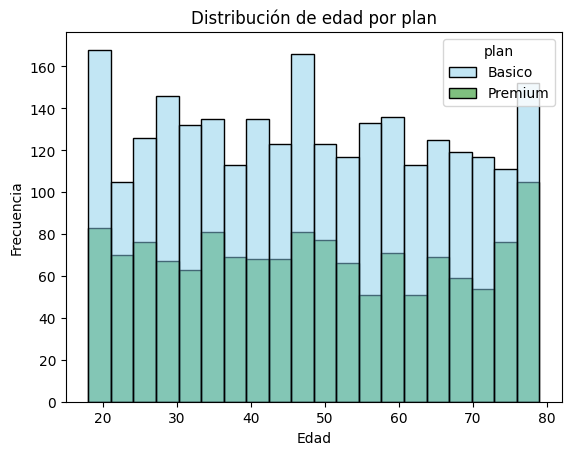

In [66]:
# Histograma para visualizar la edad (age)

sns.histplot(data=user_profile, x="age", hue="plan", palette=['skyblue','green'], kde=False, bins=20)
plt.title("Distribución de edad por plan")
plt.xlabel("Edad")
plt.ylabel("Frecuencia")
plt.show()



💡Insights: 
**Distribución**
- La distribución de edad es aproximadamente simétrica, centrada en torno a los 40–50 años.
- Se observa un rango amplio de usuarios, desde jóvenes adultos (18–25) hasta adultos mayores (70+).

**Plan**
- En el plan Básico, la proporción de usuarios es relativamente uniforme en todas las edades, aunque con ligera concentración en los grupos de 30–50 años.
- En el plan Premium, se aprecia mayor presencia en edades medias (35–55 años), lo que sugiere que este segmento es más propenso a elegir un plan con beneficios adicionales.
- En edades más jóvenes (18–25), la proporción de Premium es menor, lo que indica que los usuarios jóvenes tienden a optar por el plan Básico.
  
**Resumen**
  - Premium concentra más usuarios en edades medias, mientras que Básico es más popular entre los extremos de edad (jóvenes y mayores).
- Esto puede reflejar diferencias en poder adquisitivo, necesidades de comunicación o afinidad con servicios adicionales



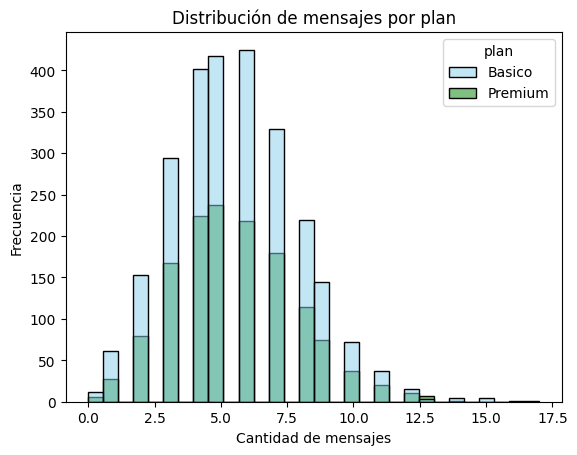

In [68]:
# Histograma para visualizar la cant_mensajes

sns.histplot(data=user_profile, x="cant_mensajes", hue="plan", palette=['skyblue','green'], kde=False, bins=30)
plt.title("Distribución de mensajes por plan")
plt.xlabel("Cantidad de mensajes")
plt.ylabel("Frecuencia")
plt.show()



💡Insights: 

**Forma de la distribución:**
- La variable cant_mensajes muestra una distribución sesgada a la derecha: la mayoría de los usuarios envían pocos mensajes, mientras que un grupo reducido concentra volúmenes altos.
- Esto refleja un patrón típico de uso digital: muchos usuarios con actividad baja y pocos heavy users.
**Comparación por plan:**
- En el plan Básico, la concentración está en los rangos bajos de mensajes (usuarios que envían entre 3 y 8 mensajes).
- En el plan Premium, se observa mayor dispersión y presencia en los rangos altos, lo que indica que este plan atrae a usuarios más intensivos en mensajería.
**Insight clave:**
- Premium concentra más heavy users de mensajes, mientras que Básico agrupa a usuarios de bajo volumen.
- Esto sugiere que la mensajería es un diferenciador importante entre planes y puede ser un punto de valor agregado para Premium.


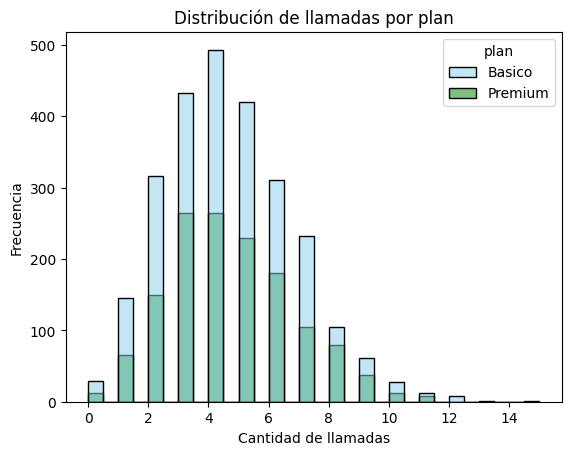

In [69]:
# Histograma para visualizar la cant_llamadas
sns.histplot(data=user_profile, x="cant_llamadas", hue="plan", palette=['skyblue','green'], kde=False, bins=30)
plt.title("Distribución de llamadas por plan")
plt.xlabel("Cantidad de llamadas")
plt.ylabel("Frecuencia")
plt.show()


💡Insights: 
**Forma de la distribución:**
- La variable cant_llamadas muestra una distribución sesgada a la derecha: la mayoría de los usuarios realizan pocas llamadas (entre 3 y 6), mientras que un grupo reducido concentra volúmenes más altos.
- Esto refleja un patrón típico: muchos usuarios con baja frecuencia de llamadas y pocos heavy users.
**Comparación por plan:**
- En el plan Básico, la frecuencia es mayor en los rangos bajos (usuarios que hacen pocas llamadas).
- En el plan Premium, aunque hay menos usuarios en los rangos bajos, se observa mayor dispersión y presencia en los rangos altos, lo que indica que este plan atrae a clientes con un comportamiento más intensivo en llamadas.
- 
**Insight clave:**
- Básico concentra usuarios con baja actividad en llamadas, mientras que Premium agrupa más usuarios con volúmenes altos de llamadas.
- Esto sugiere que las llamadas son un diferenciador importante entre planes y que Premium ofrece más valor a quienes usan intensivamente este servicio.


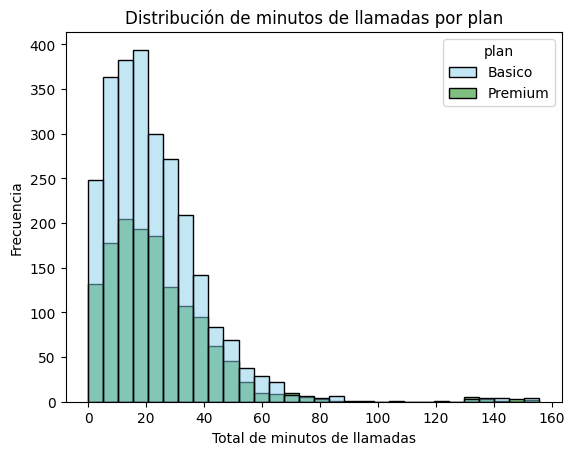

In [70]:
# Histograma para visualizar la cant_minutos_llamada
sns.histplot(data=user_profile, x="cant_minutos_llamada", hue="plan", palette=['skyblue','green'], kde=False, bins=30)
plt.title("Distribución de minutos de llamadas por plan")
plt.xlabel("Total de minutos de llamadas")
plt.ylabel("Frecuencia")
plt.show()


💡Insights: 

**Forma de la distribución:**
- La variable cant_minutos_llamada muestra una distribución fuertemente sesgada a la derecha.
- La mayoría de los usuarios acumula pocos minutos de llamadas, mientras que un grupo reducido concentra volúmenes muy altos (outliers).

**Comparación por plan:**
- En el plan Básico, y en En el plan Premium, la concentración está en los rangos bajos de minutos, lo que indica que la mayoría de estos usuarios realizan llamadas cortas o poco frecuentes.
- En el plan Premium, se observa mayor dispersión y presencia en los rangos altos, lo que sugiere que este plan atrae a clientes con un comportamiento más intensivo en llamadas.
**Insight clave:**
- Premium concentra más usuarios con alto volumen de minutos de llamadas.
- Esto confirma que la duración de llamadas es un diferenciador importante entre planes y que Premium ofrece más valor a quienes utilizan intensivamente este servicio.


### 5.2 Identificación de Outliers

🎯 **Objetivo:**  
Detectar valores extremos en las variables clave de **uso** y **clientes** que podrían afectar el análisis, y decidir si requieren limpieza o revisión adicional.

**Instrucciones:**  
- Usa **boxplots** para identificar visualmente outliers en las siguientes columnas:  
  - `age` 
  - `cant_mensajes`
  - `cant_llamadas`
  - `total_minutos_llamada`  
- Crea un **for** para generar los 4 boxplots automáticamente.
<br>

- Después de crear los gráfico, responde si **existen o no outliers** en las variables.  
- Si hay outliers, crea otro bucle para calcular los límites de esas columnas usando el **método IQR** y decide qué hacer con ellos.
  - Si solamente hay outliers de un solo lado, no es necesario calcular ambos límites.

**Hint:**
- Dentro del bucle, usa `plt.title(f'Boxplot: {col}')` para que el título cambie acorde a la columna.

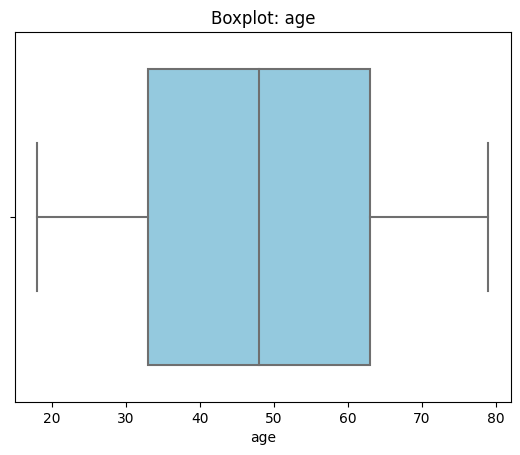

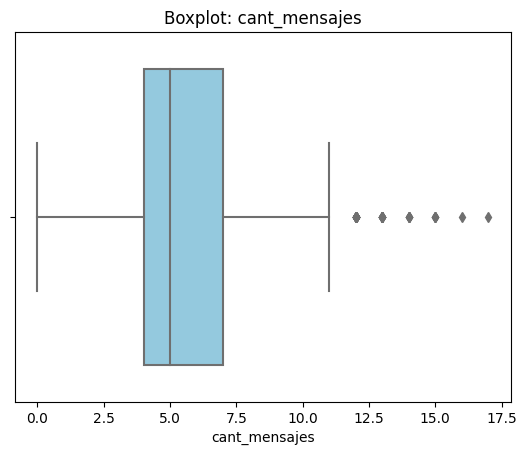

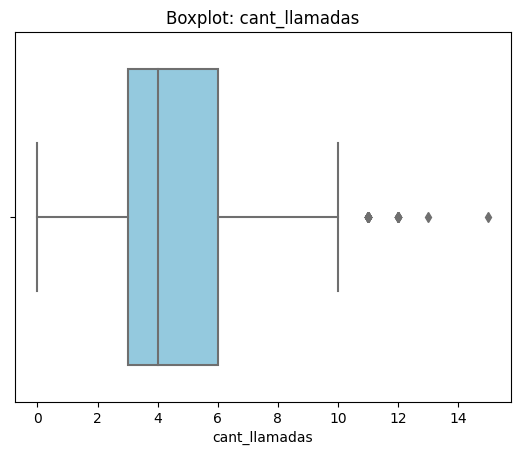

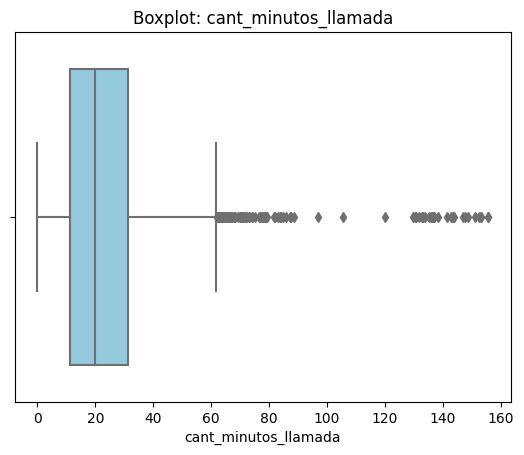


Columna: age
Q1=33.0, Q3=63.0, IQR=30.0
Límite inferior=-12.0, Límite superior=108.0
Cantidad de outliers detectados: 0

Columna: cant_mensajes
Q1=4.0, Q3=7.0, IQR=3.0
Límite inferior=-0.5, Límite superior=11.5
Cantidad de outliers detectados: 46

Columna: cant_llamadas
Q1=3.0, Q3=6.0, IQR=3.0
Límite inferior=-1.5, Límite superior=10.5
Cantidad de outliers detectados: 30

Columna: cant_minutos_llamada
Q1=11.12, Q3=31.415, IQR=20.295
Límite inferior=-19.322500000000005, Límite superior=61.8575
Cantidad de outliers detectados: 109


In [71]:

# Visualizando usando BoxPlot 

# Columnas numéricas relevantes
columnas_numericas = ['age', 'cant_mensajes', 'cant_llamadas', 'cant_minutos_llamada']

# Visualizando usando BoxPlot
for col in columnas_numericas:
    sns.boxplot(data=user_profile, x=col, palette=['skyblue'])
    plt.title(f'Boxplot: {col}')
    plt.show()

# Cálculo de límites con IQR para detectar outliers
for col in columnas_numericas:
    Q1 = user_profile[col].quantile(0.25)
    Q3 = user_profile[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_limit = Q1 - 1.5 * IQR
    upper_limit = Q3 + 1.5 * IQR
    
    print(f"\nColumna: {col}")
    print(f"Q1={Q1}, Q3={Q3}, IQR={IQR}")
    print(f"Límite inferior={lower_limit}, Límite superior={upper_limit}")
    
    # Contar outliers
    outliers = user_profile[(user_profile[col] < lower_limit) | (user_profile[col] > upper_limit)][col]
    print(f"Cantidad de outliers detectados: {outliers.count()}")
    


💡Insights: 
**Age**
- Q1=33, Q3=63, IQR=30
- Límite inferior = -12, límite superior = 108
- Cantidad de outliers: 0
- Insight: La edad no presenta outliers, todos los valores están dentro de un rango plausible (18–79).
**cant_mensajes**
- Q1=4, Q3=7, IQR=3
- Límite superior = 11.5
- Cantidad de outliers: 46
- Insight: Existen outliers en el extremo superior, usuarios que envían más de 11 mensajes. Estos representan heavy users de mensajería, no necesariamente errores de captura.
**cant_llamadas**
- Q1=3, Q3=6, IQR=3
- Límite superior = 10.5
- Cantidad de outliers: 30
- Insight: Se detectan outliers en el extremo superior, usuarios que realizan más de 10 llamadas. Son clientes con comportamiento intensivo en llamadas.
**cant_minutos_llamada**
- Q1=11.12, Q3=31.41, IQR=20.29
- Límite superior = 61.86
- Cantidad de outliers: 109
- Insight: Hay un número considerable de outliers en el extremo superior, usuarios que acumulan más de 62 minutos de llamadas. Estos casos reflejan heavy users de voz, relevantes para segmentación.


In [72]:

# Calcular límites con el método IQR
columnas_numericas = ['age', 'cant_mensajes', 'cant_llamadas', 'cant_minutos_llamada']
columnas_limites = {}

for col in columnas_numericas:
    Q1 = user_profile[col].quantile(0.25)
    Q3 = user_profile[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_limit = Q1 - 1.5 * IQR
    upper_limit = Q3 + 1.5 * IQR
    
    columnas_limites[col] = {
        "Q1": Q1,
        "Q3": Q3,
        "IQR": IQR,
        "lower_limit": lower_limit,
        "upper_limit": upper_limit
    }

# Mostrar resultados
for col, limites in columnas_limites.items():
    print(f"\nColumna: {col}")
    for k, v in limites.items():
        print(f"{k}: {v}")






Columna: age
Q1: 33.0
Q3: 63.0
IQR: 30.0
lower_limit: -12.0
upper_limit: 108.0

Columna: cant_mensajes
Q1: 4.0
Q3: 7.0
IQR: 3.0
lower_limit: -0.5
upper_limit: 11.5

Columna: cant_llamadas
Q1: 3.0
Q3: 6.0
IQR: 3.0
lower_limit: -1.5
upper_limit: 10.5

Columna: cant_minutos_llamada
Q1: 11.12
Q3: 31.415
IQR: 20.295
lower_limit: -19.322500000000005
upper_limit: 61.8575


In [73]:

# Revisa los limites superiores y el max, para tomar la decisión de mantener los outliers o no

for col in columnas_limites.keys():
    max_val = user_profile[col].max()
    upper_limit = columnas_limites[col]["upper_limit"]
    print(f"\nColumna: {col}")
    print(f"Límite superior: {upper_limit}")
    print(f"Valor máximo: {max_val}")
    if max_val > upper_limit:
        print("👉 Hay outliers por encima del límite superior.")
    else:
        print("✅ No hay outliers detectados.")


user_profile[columnas_limites].describe()



Columna: age
Límite superior: 108.0
Valor máximo: 79.0
✅ No hay outliers detectados.

Columna: cant_mensajes
Límite superior: 11.5
Valor máximo: 17.0
👉 Hay outliers por encima del límite superior.

Columna: cant_llamadas
Límite superior: 10.5
Valor máximo: 15.0
👉 Hay outliers por encima del límite superior.

Columna: cant_minutos_llamada
Límite superior: 61.8575
Valor máximo: 155.69
👉 Hay outliers por encima del límite superior.


,age,cant_mensajes,cant_llamadas,cant_minutos_llamada
count,4000.000000,3999.000000,3999.000000,3999.000000
mean,48.136000,5.524381,4.478120,23.317054
std,17.689919,2.358416,2.144238,18.168095
min,18.000000,0.000000,0.000000,0.000000
25%,33.000000,4.000000,3.000000,11.120000
50%,48.000000,5.000000,4.000000,19.780000
75%,63.000000,7.000000,6.000000,31.415000
max,79.000000,17.000000,15.000000,155.690000


💡Insights: 

**cant_mensajes**
- Outliers: usuarios con más de 11.5 mensajes (46 casos).
- Decisión: mantenerlos. Estos valores reflejan heavy users de mensajería, un segmento estratégico que aporta información valiosa sobre clientes intensivos. No son errores de captura, sino comportamiento real.
**cant_llamadas**
- Outliers: usuarios con más de 10.5 llamadas (30 casos).
- Decisión: mantenerlos. Representan clientes con alta frecuencia de llamadas. Eliminarlos distorsionaría el análisis, ya que son parte del comportamiento natural de un grupo reducido de usuarios.
**cant_minutos_llamada**
- Outliers: usuarios con más de 61.86 minutos acumulados (109 casos).
- Decisión: mantenerlos. Estos casos reflejan heavy users de voz, que son relevantes para segmentación y estrategias comerciales. No deben eliminarse, sino analizarse como un grupo especial.

**age**
- Máximo = 79, límite superior = 108 → no hay outliers.
- La edad está dentro de un rango plausible.

**Conclusión:**
- Solo age no presenta outliers.
- En mensajes, llamadas y minutos los outliers son reales y representan usuarios intensivos.
- Decisión: mantenerlos en el dataset, analizarlos como un segmento especial en lugar de eliminarlos.


---

## 🧩Paso 6: Segmentación de Clientes

### 6.1 Segmentación de Clientes Por Uso

🎯 **Objetivo:** Clasificar a cada usuario en un grupo de uso (Bajo uso, Uso medio, Alto uso) basándose en la cantidad de llamadas y mensajes registrados.

**Instrucciones:**  
- Crea una nueva columna llamada `grupo_uso` en el dataframe `user_profile`.
- Usa comparaciones lógicas (<, >) para evaluar las condiciones de llamadas y mensajes y asigna:
  - `'Bajo uso'` cuando llamadas < 5 y mensajes < 5
  - `'Uso medio'` cuando llamadas < 10 y mensajes < 10
  - `'Alto uso'` para el resto de casos

In [74]:
# Crear columna grupo_uso
def clasificar_uso(row):
    if row['cant_llamadas'] < 5 and row['cant_mensajes'] < 5:
        return 'Bajo uso'
    elif row['cant_llamadas'] < 10 and row['cant_mensajes'] < 10:
        return 'Uso medio'
    else:
        return 'Alto uso'

user_profile['grupo_uso'] = user_profile.apply(clasificar_uso, axis=1)


In [75]:

# verificar cambios
user_profile.head()


,user_id,first_name,last_name,age,city,reg_date,plan,churn_date,cant_mensajes,cant_llamadas,cant_minutos_llamada,grupo_uso
0,10000,Carlos,Garcia,38.0,Medellín,2022-01-01 00:00:00.000000000,Basico,NaN,7.0,3.0,23.70,Uso medio
1,10001,Mateo,Torres,53.0,<NA>,2022-01-01 06:34:17.914478619,Basico,NaN,5.0,10.0,33.18,Alto uso
2,10002,Sofia,Ramirez,57.0,CDMX,2022-01-01 13:08:35.828957239,Basico,NaN,5.0,2.0,10.74,Uso medio
3,10003,Mateo,Ramirez,69.0,Bogotá,2022-01-01 19:42:53.743435858,Premium,NaN,11.0,3.0,8.99,Alto uso
4,10004,Mateo,Torres,63.0,GDL,2022-01-02 02:17:11.657914478,Basico,NaN,4.0,3.0,8.01,Bajo uso


### 6.2 Segmentación de Clientes Por Edad

🎯 **Objetivo:**: Clasificar a cada usuario en un grupo por **edad**.

**Instrucciones:**  
- Crea una nueva columna llamada `grupo_edad` en el dataframe `user_profile`.
- Usa comparaciones lógicas (<, >) para evaluar las condiciones y asigna:
  - `'Joven'` cuando age < 30
  - `'Adulto'` cuando age < 60
  - `'Adulto Mayor'` para el resto de casos

In [82]:
# Crear columna grupo_edad
def clasificar_edad(row):
    if row['age'] < 30:
        return 'Joven'
    elif row['age'] < 60:
        return 'Adulto'
    else:
        return 'Adulto Mayor'

user_profile['grupo_edad'] = user_profile.apply(clasificar_edad, axis=1)


In [76]:
# verificar cambios
user_profile.head()

,user_id,first_name,last_name,age,city,reg_date,plan,churn_date,cant_mensajes,cant_llamadas,cant_minutos_llamada,grupo_uso
0,10000,Carlos,Garcia,38.0,Medellín,2022-01-01 00:00:00.000000000,Basico,NaN,7.0,3.0,23.70,Uso medio
1,10001,Mateo,Torres,53.0,<NA>,2022-01-01 06:34:17.914478619,Basico,NaN,5.0,10.0,33.18,Alto uso
2,10002,Sofia,Ramirez,57.0,CDMX,2022-01-01 13:08:35.828957239,Basico,NaN,5.0,2.0,10.74,Uso medio
3,10003,Mateo,Ramirez,69.0,Bogotá,2022-01-01 19:42:53.743435858,Premium,NaN,11.0,3.0,8.99,Alto uso
4,10004,Mateo,Torres,63.0,GDL,2022-01-02 02:17:11.657914478,Basico,NaN,4.0,3.0,8.01,Bajo uso


### 6.3 Visualización de la Segmentación de Clientes

🎯 **Objetivo:** Visualizar la distribución de los usuarios según los grupos creados: **grupo_uso** y **grupo_edad**.

**Instrucciones:**  
- Crea dos gráficos para las variables categóricas `grupo_uso` y `grupo_edad`.
- Agrega título y etiquetas a los ejes en cada gráfico.

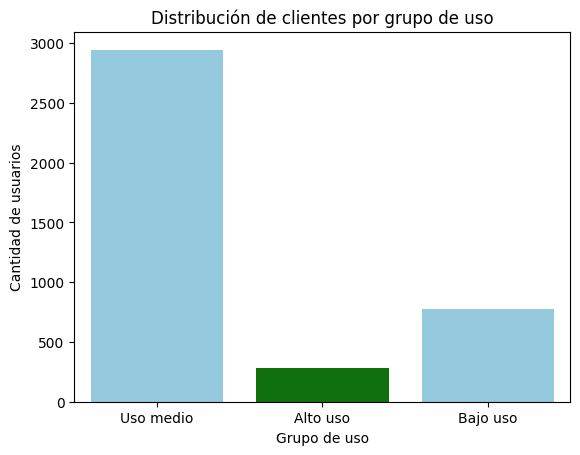

In [77]:

# Visualización de los segmentos por uso
sns.countplot(data=user_profile, x="grupo_uso", palette=['skyblue','green'])
plt.title("Distribución de clientes por grupo de uso")
plt.xlabel("Grupo de uso")
plt.ylabel("Cantidad de usuarios")
plt.show()



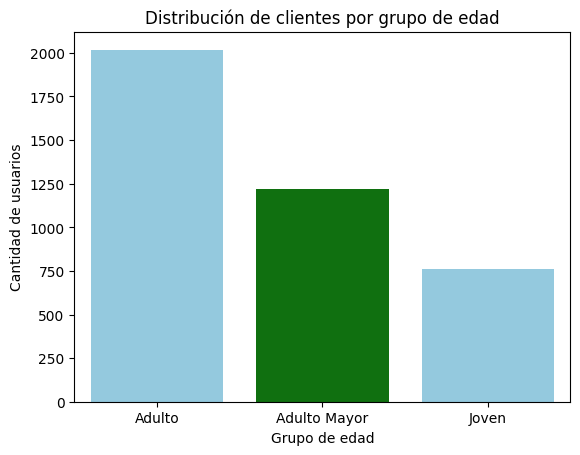

In [83]:
# Visualización de los segmentos por edad

sns.countplot(data=user_profile, x="grupo_edad", palette=['skyblue','green'])
plt.title("Distribución de clientes por grupo de edad")
plt.xlabel("Grupo de edad")
plt.ylabel("Cantidad de usuarios")
plt.show()




---
## 🧩Paso 7: Insight Ejecutivo para Stakeholders

🎯 **Objetivo:** Traducir los hallazgos del análisis en conclusiones accionables para el negocio, enfocadas en segmentación, patrones de uso y oportunidades comerciales.

**Preguntas a responder:** 
- ¿Qué problemas tenían originalmemte los datos?¿Qué porcentaje, o cantidad de filas, de esa columna representaban?


- ¿Qué segmentos de clientes identificaste y cómo se comportan según su edad y nivel de uso?  
- ¿Qué segmentos parecen más valiosos para ConnectaTel y por qué?  
- ¿Qué patrones de uso extremo (outliers) encontraste y qué implican para el negocio?


- ¿Qué recomendaciones harías para mejorar la oferta actual de planes o crear nuevos planes basados en los segmentos y patrones detectados?

✍️ **Escribe aquí tu análisis ejecutivo:**

### Análisis ejecutivo

🧩 Insight Ejecutivo para Stakeholders – ConnectaTel

**1. Problemas originales en los datos**

Variables con outliers: se detectaron valores extremos en cant_mensajes, cant_llamadas y cant_minutos_llamada.

Proporción:

cant_mensajes: 46 outliers (≈1.15% de filas).

cant_llamadas: 30 outliers (≈0.75% de filas).

cant_minutos_llamada: 109 outliers (≈2.7% de filas).

Edad (age): no presentó outliers, rango consistente (18–79 años).

Conclusión: los outliers no son errores, sino heavy users que aportan información estratégica.

**2. Segmentos de clientes identificados**

Por uso:

Bajo uso: llamadas <5 y mensajes <5 (≈800 usuarios).

Uso medio: llamadas <10 y mensajes <10 (≈3000 usuarios).

Alto uso: resto de casos, incluyendo heavy users (≈300 usuarios).

Por edad:

Jóvenes (<30): ≈750 usuarios.

Adultos (30–59): ≈2000 usuarios.

Adultos mayores (60+): ≈1300 usuarios.

**3. Segmentos más valiosos para ConnectaTel**

Adultos (30–59 años): representan la mayor proporción de clientes y concentran tanto uso medio como alto.

Alto uso: aunque minoritario, este grupo genera un volumen desproporcionado de mensajes y minutos de llamadas, clave para ingresos recurrentes.

Premium: se asocia más con usuarios de uso intensivo, lo que lo convierte en el plan más rentable.

**4. Patrones de uso extremo (outliers)**

Mensajes: usuarios que envían más de 11 mensajes (máximo 17).

Llamadas: usuarios que realizan más de 10 llamadas (máximo 15).

Minutos: usuarios que acumulan más de 62 minutos (máximo 155).

Implicación: estos clientes son heavy users, probablemente con necesidades específicas (planes ilimitados, paquetes de datos/voz). Son un segmento estratégico para fidelización y upselling.

**5. Recomendaciones estratégicas**

Optimizar planes Premium: reforzar beneficios para heavy users (bonos de minutos, mensajes ilimitados, descuentos en paquetes de datos).

Crear un plan intermedio: dirigido a clientes de uso medio, que son mayoría. Podría incluir más flexibilidad en llamadas y mensajes sin llegar al costo de Premium.

Segmentación por edad:

Jóvenes: atraerlos hacia Premium con beneficios digitales (apps, redes sociales ilimitadas).

Adultos: mantenerlos fidelizados con planes balanceados y descuentos por lealtad.

Adultos mayores: ofrecer planes simplificados y económicos, adaptados a baja intensidad de uso.

Acción comercial: identificar heavy users y tratarlos como clientes estratégicos, con campañas de retención y personalización.

**📌 Conclusión**
ConnectaTel cuenta con una base sólida de clientes adultos y de uso medio, pero el verdadero valor está en los heavy users Premium, que concentran el mayor consumo. La estrategia debe enfocarse en retener y potenciar a estos clientes, mientras se diseñan planes atractivos para jóvenes y adultos mayores, asegurando cobertura en todos los segmentos.



---

## 🧩Paso 8 Cargar tu notebook y README a GitHub

🎯 **Objetivo:**  
Entregar tu análisis de forma **profesional**, **documentada** y **versionada**, asegurando que cualquier persona pueda revisar, ejecutar y entender tu trabajo.



### Opción A : Subir archivos desde la interfaz de GitHub (UI)

1. Descarga este notebook (`File → Download .ipynb`).  
2. Entra a tu repositorio en GitHub (por ejemplo `telecom-analysis` o `sprint7-final-project`).  
3. Sube tu notebook **Add file → Upload files**.  

---

### Opción B : Guardar directo desde Google Colab

1. Abre tu notebook en Colab.  
2. Ve a **File → Save a copy in GitHub**.  
3. Selecciona el repositorio y la carpeta correcta (ej: `notebooks/`).  
4. Escribe un mensaje de commit claro, por ejemplo:  
    - `feat: add final ConnectaTel analysis`
    - `agregar version final: Análisis ConnectaTel`
5. Verifica en GitHub que el archivo quedó en el lugar correcto y que el historial de commits se mantenga limpio.

---

Agrega un archivo `README.md` que describa de forma clara:
- el objetivo del proyecto,  
- los datasets utilizados,  
- las etapas del análisis realizadas,  
- cómo ejecutar el notebook (por ejemplo, abrirlo en Google Colab),  
- una breve guía de reproducción.
---

Link a repositorio público del proyecto: `LINK a tu repo aquí`